# Create crossval tables

This notebook is dedicated to create the cv table to all tunings produced during 2020 for tracking purpose.


In [1]:
from kolmov import crossval_table, get_color_fader
import numpy as np
import pandas as pd
import collections
import os
import matplotlib
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
#%load_ext autoreload
#%autoreload 2

Welcome to JupyROOT 6.16/00
aki joao
Using all sub packages with ROOT dependence


In [2]:
def create_op_dict(op):
    d = {
              op+'_pd_ref'    : "reference/"+op+"_cutbased/pd_ref#0",
              op+'_fa_ref'    : "reference/"+op+"_cutbased/fa_ref#0",
              op+'_sp_ref'    : "reference/"+op+"_cutbased/sp_ref",
              op+'_pd_val'    : "reference/"+op+"_cutbased/pd_val#0",
              op+'_fa_val'    : "reference/"+op+"_cutbased/fa_val#0",
              op+'_sp_val'    : "reference/"+op+"_cutbased/sp_val",
              op+'_pd_op'     : "reference/"+op+"_cutbased/pd_op#0",
              op+'_fa_op'     : "reference/"+op+"_cutbased/fa_op#0",
              op+'_sp_op'     : "reference/"+op+"_cutbased/sp_op",

              # Counts
              op+'_pd_ref_passed'    : "reference/"+op+"_cutbased/pd_ref#1",
              op+'_fa_ref_passed'    : "reference/"+op+"_cutbased/fa_ref#1",
              op+'_pd_ref_total'     : "reference/"+op+"_cutbased/pd_ref#2",
              op+'_fa_ref_total'     : "reference/"+op+"_cutbased/fa_ref#2",
              op+'_pd_val_passed'    : "reference/"+op+"_cutbased/pd_val#1",
              op+'_fa_val_passed'    : "reference/"+op+"_cutbased/fa_val#1",
              op+'_pd_val_total'     : "reference/"+op+"_cutbased/pd_val#2",
              op+'_fa_val_total'     : "reference/"+op+"_cutbased/fa_val#2",
              op+'_pd_op_passed'     : "reference/"+op+"_cutbased/pd_op#1",
              op+'_fa_op_passed'     : "reference/"+op+"_cutbased/fa_op#1",
              op+'_pd_op_total'      : "reference/"+op+"_cutbased/pd_op#2",
              op+'_fa_op_total'      : "reference/"+op+"_cutbased/fa_op#2",
    }
    return d

tuned_info = collections.OrderedDict( {
              # validation
              "max_sp_val"      : 'summary/max_sp_val',
              "max_sp_pd_val"   : 'summary/max_sp_pd_val#0',
              "max_sp_fa_val"   : 'summary/max_sp_fa_val#0',
              # Operation
              "max_sp_op"       : 'summary/max_sp_op',
              "max_sp_pd_op"    : 'summary/max_sp_pd_op#0',
              "max_sp_fa_op"    : 'summary/max_sp_fa_op#0',
              } )

tuned_info.update(create_op_dict('tight'))
tuned_info.update(create_op_dict('medium'))
tuned_info.update(create_op_dict('loose'))
tuned_info.update(create_op_dict('vloose'))

In [3]:
etbins = [15, 20, 30, 40, 50, 1000000]
etabins = [0.0, 0.8, 1.37, 1.54, 2.37, 2.50]

## 1) Reading all tunings:


In [4]:
cv_v8  = crossval_table( tuned_info, etbins = etbins , etabins = etabins )
cv_v9  = crossval_table( tuned_info, etbins = etbins , etabins = etabins )
cv_v10 = crossval_table( tuned_info, etbins = etbins , etabins = etabins )
cv_v11 = crossval_table( tuned_info, etbins = etbins , etabins = etabins )

In [6]:
# just for comparison
cv_v8.fill(  '/home/jodafons/public/tuning_data/Zee/v8/r0/*/*/*.gz' , 'v8' )
cv_v9.fill(  '/home/jodafons/public/tuning_data/Zee/v9/r1/*/*/*.gz' , 'v9' )
cv_v10.fill( '/home/jodafons/public/tuning_data/Zee/v10/r2/*/*/*.gz', 'v10')
cv_v11.fill( '/home/jodafons/public/tuning_data/Zee/v11/r1/*/*/*.gz', 'v11') 

Reading v11...: 100%|██████████| 2500/2500 [01:33<00:00, 26.87it/s]

2021-11-12 09:53:17,682 | Py.crossval_table                       INFO Reading file for v8 tag from /home/jodafons/public/tuning_data/Zee/v8/r0/*/*/*.gz
2021-11-12 09:58:46,258 | Py.crossval_table                       INFO End of fill step, a pandas DataFrame was created...
2021-11-12 09:58:50,138 | Py.crossval_table                       INFO Reading file for v9 tag from /home/jodafons/public/tuning_data/Zee/v9/r1/*/*/*.gz
2021-11-12 10:00:32,000 | Py.crossval_table                       INFO End of fill step, a pandas DataFrame was created...
2021-11-12 10:00:35,789 | Py.crossval_table                       INFO Reading file for v10 tag from /home/jodafons/public/tuning_data/Zee/v10/r2/*/*/*.gz
2021-11-12 10:02:15,450 | Py.crossval_table                       INFO End of fill step, a pandas DataFrame was created...
2021-11-12 10:02:19,217 | Py.crossval_table                       INFO Reading file for v11 tag from /home/jodafons/public/tuning_data/Zee/v11/r1/*/*/*.gz
2021-11-12 10:0

In [8]:
cv_v8.to_csv('output/table_v8.csv')
cv_v9.to_csv('output/table_v9.csv')
cv_v10.to_csv('output/table_v10.csv')
cv_v11.to_csv('output/table_v11.csv')

**NOTE** Use the cell below to rerun all tables from the csv file.

In [5]:
cv_v8.from_csv('output/table_v8.csv')
cv_v9.from_csv('output/table_v9.csv')
cv_v10.from_csv('output/table_v10.csv')
cv_v11.from_csv('output/table_v11.csv')

### 1.1) Get best inits and sorts:

In [6]:
best_inits_v8 = cv_v8.filter_inits("max_sp_val")
best_sorts_v8 = cv_v8.filter_sorts( best_inits_v8 , 'max_sp_op')
best_inits_v8 = best_inits_v8.loc[best_inits_v8.model_idx==3]

In [7]:
best_inits_v9 = cv_v9.filter_inits("max_sp_val")
best_sorts_v9 = cv_v9.filter_sorts( best_inits_v9 , 'max_sp_op')

In [8]:
best_inits_v10 = cv_v10.filter_inits("max_sp_val")
best_sorts_v10 = cv_v10.filter_sorts( best_inits_v10 , 'max_sp_op')

In [9]:
best_inits_v11 = cv_v11.filter_inits("max_sp_val")
best_sorts_v11 = cv_v11.filter_sorts( best_inits_v11 , 'max_sp_op')

In [10]:
best_inits = pd.concat([
                        best_inits_v8,
                        best_inits_v9,
                        best_inits_v10,
                        best_inits_v11,
                       ])
best_sorts = pd.concat([
                        best_sorts_v8,
                        best_sorts_v9,
                        best_sorts_v10,
                        best_sorts_v11,
                       ])

In [11]:
best_inits.head()

,train_tag,et_bin,eta_bin,model_idx,sort,init,file_name,tuned_idx,max_sp_val,max_sp_pd_val,...,vloose_pd_ref_total,vloose_fa_ref_total,vloose_pd_val_passed,vloose_fa_val_passed,vloose_pd_val_total,vloose_fa_val_total,vloose_pd_op_passed,vloose_fa_op_passed,vloose_pd_op_total,vloose_fa_op_total
303,v8,0,0,3,0,4,/home/jodafons/public/tuning_data/Zee/v8/r0/us...,0,0.978118,0.982948,...,232819,187639,23015,683,23282,18764,230153,7089,232819,187639
318,v8,0,0,3,1,7,/home/jodafons/public/tuning_data/Zee/v8/r0/us...,0,0.975846,0.984237,...,232819,187639,23016,740,23282,18764,230153,7040,232819,187639
322,v8,0,0,3,2,2,/home/jodafons/public/tuning_data/Zee/v8/r0/us...,0,0.975065,0.983421,...,232819,187639,23014,752,23282,18764,230153,6963,232819,187639
331,v8,0,0,3,3,2,/home/jodafons/public/tuning_data/Zee/v8/r0/us...,0,0.976284,0.984795,...,232819,187639,23015,710,23282,18764,230153,6956,232819,187639
345,v8,0,0,3,4,5,/home/jodafons/public/tuning_data/Zee/v8/r0/us...,0,0.977574,0.983464,...,232819,187639,23015,661,23282,18764,230153,6956,232819,187639


### 1.2) Make the table:

In [12]:
for op in ['tight','medium','loose','vloose']:
    cv_v8.dump_beamer_table( best_inits ,  [op], 'tuning_v8_to_v11_'+op, 
                             title = op+' Tunings (v8 to v11)', 
                             tags = ['v8','v9','v10','v11']
                           )

2021-11-12 10:14:03,202 | Py.BeamerTexReportTemplate1             INFO Started creating beamer file tuning_v8_to_v11_tight.pdf latex code...
2021-11-12 10:14:06,062 | Py.BeamerTexReportTemplate1             INFO Started creating beamer file tuning_v8_to_v11_medium.pdf latex code...
2021-11-12 10:14:08,922 | Py.BeamerTexReportTemplate1             INFO Started creating beamer file tuning_v8_to_v11_loose.pdf latex code...
2021-11-12 10:14:11,790 | Py.BeamerTexReportTemplate1             INFO Started creating beamer file tuning_v8_to_v11_vloose.pdf latex code...


In [13]:
!mv *.tex output
!mv *.pdf output

mv: cannot stat '*.pdf': No such file or directory


### 1.3) Plot training curves:

In [13]:
cv_v8.plot_training_curves( best_inits_v8, best_sorts_v8 , 'output/v8' )

In [14]:
cv_v9.plot_training_curves( best_inits_v9, best_sorts_v9 , 'output/v9' )

In [15]:
cv_v10.plot_training_curves( best_inits_v10, best_sorts_v10 , 'output/v10' )

In [16]:
cv_v11.plot_training_curves( best_inits_v11, best_sorts_v11 , 'output/v11' )

### 1.4) Plot RoC curves:

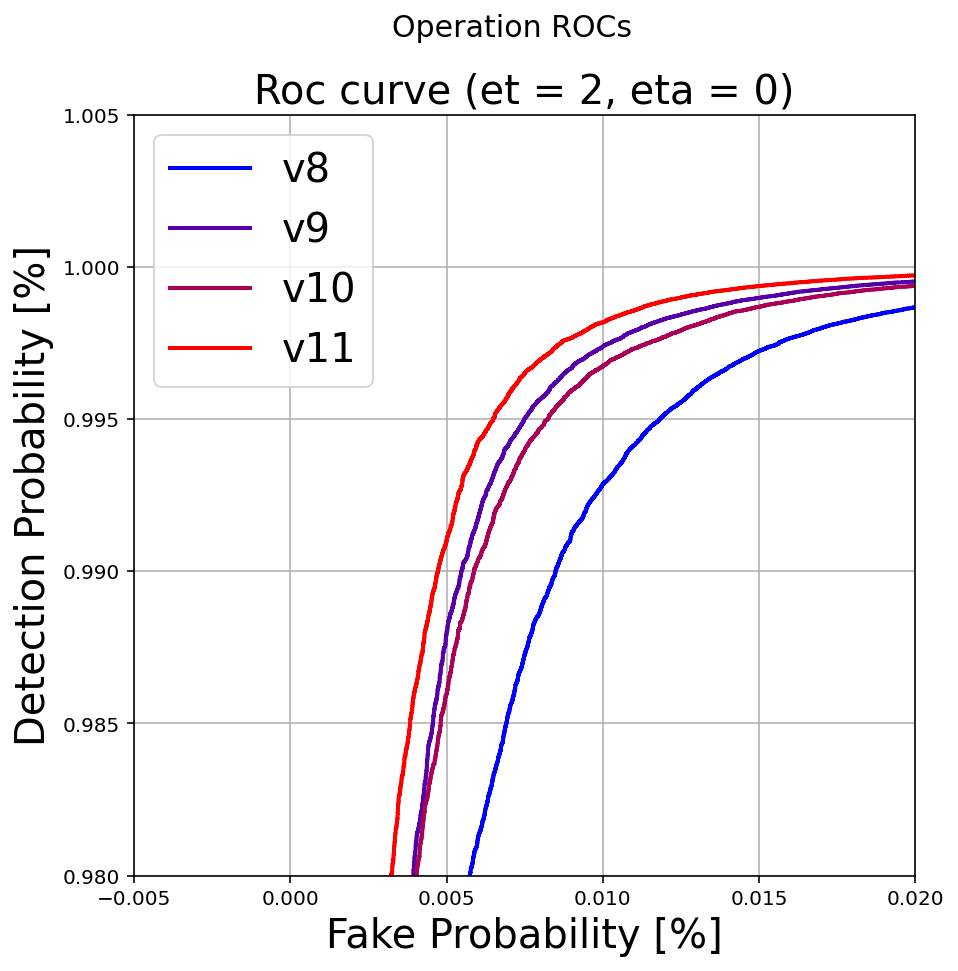

In [17]:
cv_v8.plot_roc_curves( best_sorts, ['v8', 'v9', 'v10','v11'], 
                        ['v8', 'v9', 'v10','v11'], 
                        'output/roc_v8_to_v11_et2_eta0.pdf', display=True, 
                        colors=get_color_fader('blue','red',4) ,
                        et_bin=2, eta_bin=0, xmin=-0.005, xmax=0.02, ymin=0.980, ymax=1.005, 
                        fontsize=20,
                        figsize=(7,7))

In [18]:
cv_v8.plot_roc_curves( best_sorts, ['v8', 'v9','v10','v11'], 
                       ['v8', 'v9','v10','v11'], 
                        'output/rocs_v8_to_v11.pdf',display=False, colors=get_color_fader('blue','red',4),
                       figsize=(30,30))